In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from python2 import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [300]:
from proj1_helpers import *

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [43]:
y = (y+1)/2

## Do your thing crazy machine learning thing here :) ...

In [41]:
tX4 = np.where(tX == -999, 0, tX)
weights, error = least_squares(y,tX)
tX3 = standardize(tX)
tx = np.c_[np.ones((y.shape[0], 1)), tX]
weigths4,error4 = least_squares(y,tx)
weights3, error3 = least_squares(y,tX3)
weights2, error2 = least_squares(y,tX2)
print(error3)
print(error2)
print(error4)

NameError: name 'tX2' is not defined

In [10]:
weights = []
weights.append(2)
weights.append([1,3])
weights[1][1]

3

In [21]:
tX3 = np.where(tX == -999, 0, tX)

[-1. -1. -1. ... -1.  1. -1.]


0.208784

In [30]:
weights, error = least_squares(y,tx)


In [377]:
tX3 = np.where(tX == -999, 0, tX)
tX4 = standardize(tX4)

(250000, 30)

In [376]:
tx4 = build_poly(tX3,11)

In [347]:
tx5 = build_poly(tX4,10)

In [305]:
weights4, error4 = least_squares(y,tx4)
loss_really(weights4,y,tx4)

[-1. -1. -1. ... -1. -1. -1.]


0.187412

In [303]:
weights5, error5 = least_squares(y,tx5)
loss_really(weights5,y,tx5)

[-1. -1. -1. ... -1. -1. -1.]


0.187028

In [298]:
weights_r, error_r =  ridge_regression(y,tx5,0)
loss_really(weights_r,y,tx5)

NameError: name 'predict_labels' is not defined

In [198]:
weights, error = least_squares(y,tx)
loss_really(weights,y,tx)

LinAlgError: Singular matrix

In [378]:
col_1 = ((tX[:,0] == -999) + 0).reshape(-1,1)
col_4 = ((tX[:,4] == -999) + 0).reshape(-1,1)
col_23 = ((tX[:,23] == -999) + 0).reshape(-1,1)
np.sum(col_23)
tx_final = np.concatenate((tx4,col_1,col_4,col_23),1)


In [381]:
weight, error = least_squares(y,tx_final)
loss_really(weight,y,tx_final)


[ 1. -1. -1. ... -1. -1. -1.]


(250000, 334)

In [380]:
weights, error = least_squares(y,tx4)
loss_really(weights,y,tx4)

[ 1. -1. -1. ... -1. -1. -1.]


0.187548

In [108]:
gamma = 1
initial_w = np.zeros(tX.shape[1])
calculate_loss_sigmoid(y,tX,initial_w)
l , w = learning_by_gradient_descent(y,tX,initial_w,gamma)

In [86]:
calculate_loss_sigmoid(y,tX,w)

/Users/kevinrizk/Documents/GitHub/Project1/Kevin Rizk/scripts/python2.py:115: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-t))


8.31428403495654

In [69]:
error

0.29273084085570217

In [124]:
l, w = logistic_regression(y,tX,initial_w,40,1)
w

array([ 6.22247909e+02, -2.14031775e+02, -1.26608944e+02,  2.96897072e+01,
        8.23041713e+01,  1.69686797e+02,  8.05271229e+01, -2.22734508e+00,
       -3.45877138e+01, -1.43681571e+02, -4.60794567e+00,  3.00625740e+00,
        8.31509741e+01,  3.76655001e+01, -4.28904955e-02, -1.39152546e-01,
       -7.64983261e+01, -2.14565281e-02,  9.99532866e-02, -4.06459281e+01,
        1.84784400e-01, -2.01103537e+02, -2.46711846e+00,  1.92909579e+02,
        2.11914069e+02,  2.11921329e+02,  2.98315227e+01,  8.31869918e+01,
        8.31026703e+01, -1.04848722e+02])

In [135]:
loss_really(w,y,tX) 

[1. 0. 0. ... 0. 0. 0.]
[False False False ...  True False False]


0.311088

In [130]:
def predict_labels2(weights, data):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = np.dot(data, weights)
    y_pred[np.where(y_pred <= 0.5)] = -1
    y_pred[np.where(y_pred > 0.5)] = 1
    
    return y_pred

In [35]:
tx_tr,tx_te,y_tr,y_te = split_data(tx, y, 0.9)

In [37]:
lambdas = np.logspace(-10,0,num = 10)
lambdas

array([1.00000000e-10, 1.29154967e-09, 1.66810054e-08, 2.15443469e-07,
       2.78255940e-06, 3.59381366e-05, 4.64158883e-04, 5.99484250e-03,
       7.74263683e-02, 1.00000000e+00])

In [38]:
index = 0 
errors = []
weightss = []
for lambda_ in lambdas:
    weights_r, error_r =  ridge_regression(y_tr,tx_tr,lambda_)
    errors.append(loss_really(weights_r,y_te,tx_te))
    weightss.append(weights_r)


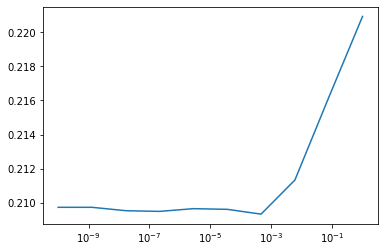

In [39]:
plt.semilogx(lambdas,errors)

In [370]:
weights = weightss[np.argmin(errors)]

In [371]:
loss_really(weights,y_te,tx_te)

[-1. -1.  1. ...  1.  1.  1.]


0.18232729309172366

## Generate predictions and save ouput in csv format for submission:

In [321]:
t2 = np.zeros(30)
for i in range(30):
    t2[i] = np.sum(tX_test[:,i] == -999)

In [330]:
col_1 = (tX[:,0] == -999) + 0

array([0, 0, 1, ..., 0, 0, 1])

In [322]:
t2

array([ 86488.,      0.,      0.,      0., 402796., 402796., 402796.,
            0.,      0.,      0.,      0.,      0., 402796.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0., 227458., 227458., 227458., 402796., 402796.,
       402796.,      0.])

In [312]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [192]:
tx_test = build_poly(tX_test,7)

In [87]:
tX4_test = np.where(tX_test == -999, 0, tX_test)
tx4_test = build_poly(tX4_test,11)

In [88]:
OUTPUT_PATH = '../data/submission_test2.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx4_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)